In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tkinter import *
from tkinter import filedialog
import tkinter as tk


In [3]:
file_path = "C:/Users/SK/Downloads/StudentsPerformance.csv"
df = pd.read_csv(file_path)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
#display the data tail
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
# Display the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# Display the first to 10 of the dataset
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [8]:
# Identify the target variable
target_column = 'math score'

In [9]:
# Select relevant features and target variable
features = df[['reading score', 'writing score']]
target = df[target_column]


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [11]:
X_train

,reading score,writing score
29,70,75
535,83,83
695,89,86
557,67,66
836,64,57
...,...,...
106,100,100
270,63,61
860,62,53
435,48,53


In [12]:
X_test

,reading score,writing score
521,86,84
737,66,73
740,73,72
660,77,73
411,83,78
...,...,...
408,57,56
332,56,53
208,81,76
613,77,74


In [13]:
# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
# Predict on the test set
y_pred = model.predict(X_test)

In [15]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 77.24297821278955


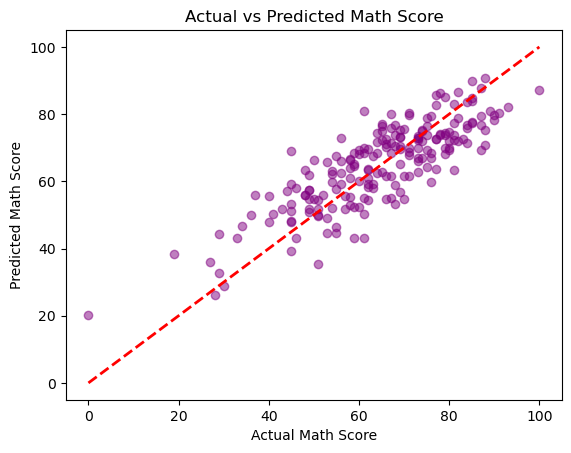

In [16]:
# Actual vs. Predicted Scores
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted Math Score')
plt.show()


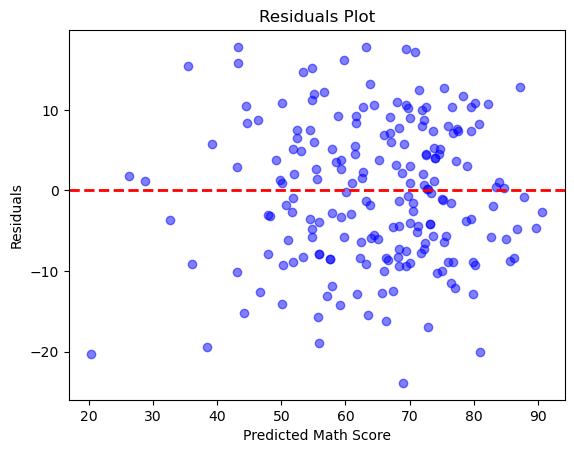

In [17]:
# Residuals Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.xlabel('Predicted Math Score')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.show()


In [18]:
# Overview of the dataset
df_info = df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [19]:
# Descriptive statistics
df_describe = df.describe().T



In [20]:
# Missing values
missing_values = df.isnull().sum()*100/len(df)


In [21]:
# Duplicated values
duplicated_values = df.duplicated()


In [22]:
# Categorical column counts
columns_to_count = ['gender', 'race/ethnicity', 'parental level of education', 'lunch']
categorical_counts = {col: df[col].value_counts().to_frame() for col in columns_to_count}


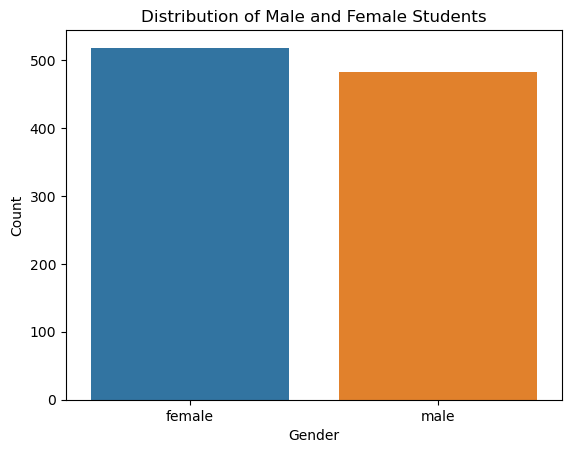

In [23]:
# Gender Distribution
sns.countplot(data=df, x=df['gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Male and Female Students')
plt.show()

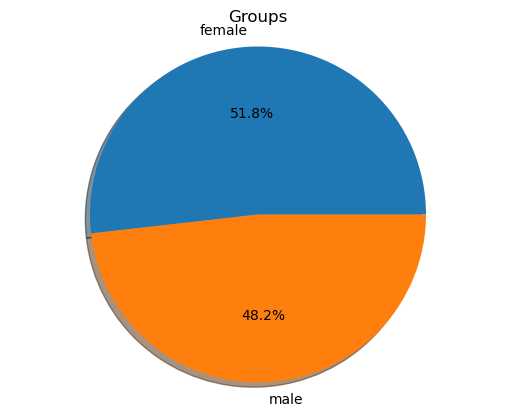

In [24]:
# Groups 
plt.pie(df['gender'].value_counts().values, autopct='%1.1f%%', labels=df['gender'].value_counts().index, shadow=True)
plt.axis('equal') 
plt.title('Groups')
plt.show()


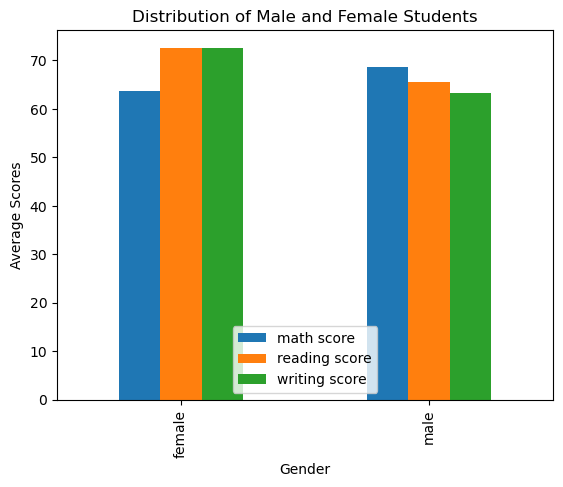

In [25]:
# Average Scores by Gender
scores = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
scores.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Average Scores')
plt.title('Distribution of Male and Female Students')
plt.show()

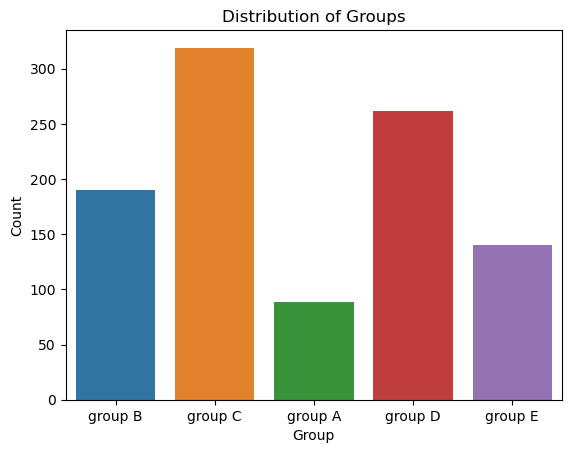

In [26]:
# Distribution of Groups
sns.countplot(data=df, x=df['race/ethnicity'])
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Distribution of Groups')
plt.show()


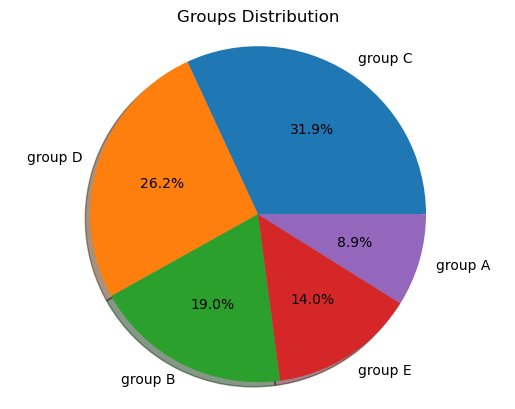

In [27]:
plt.pie(df['race/ethnicity'].value_counts().values, autopct='%1.1f%%', labels=df['race/ethnicity'].value_counts().index, shadow=True)
plt.axis('equal') 
plt.title('Groups Distribution')
plt.show()


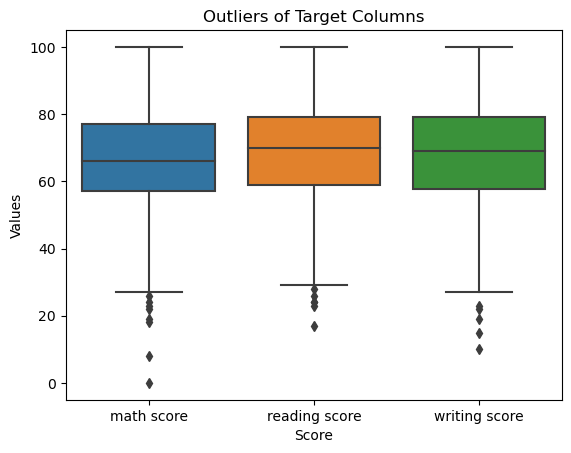

In [28]:
# Outliers of Target Columns
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.xlabel('Score')
plt.ylabel('Values')
plt.title('Outliers of Target Columns')
plt.show()


C:\Users\SK\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


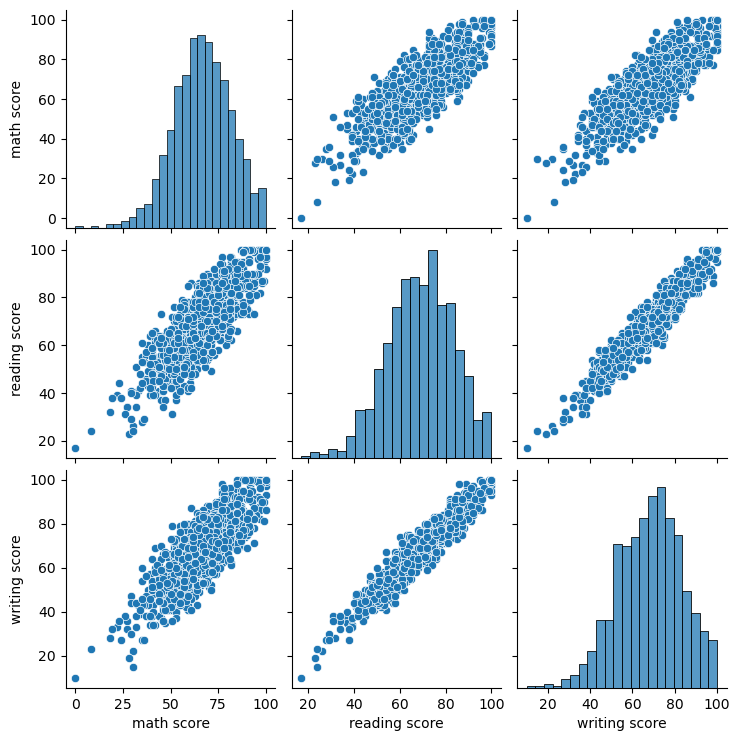

In [29]:
# Pairplot for data distribution
sns.pairplot(df)


Text(0.5, 1.0, 'Distribution of Math Score')

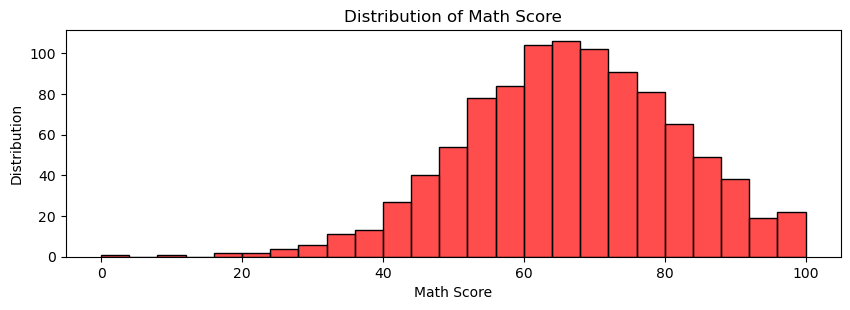

In [30]:
# Individual Score Distributions
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
sns.histplot(data=df, x=df['math score'], alpha=0.7, color='red')
plt.xlabel('Math Score')
plt.ylabel('Distribution')
plt.title('Distribution of Math Score')

Text(0.5, 1.0, 'Distribution of Reading Score')

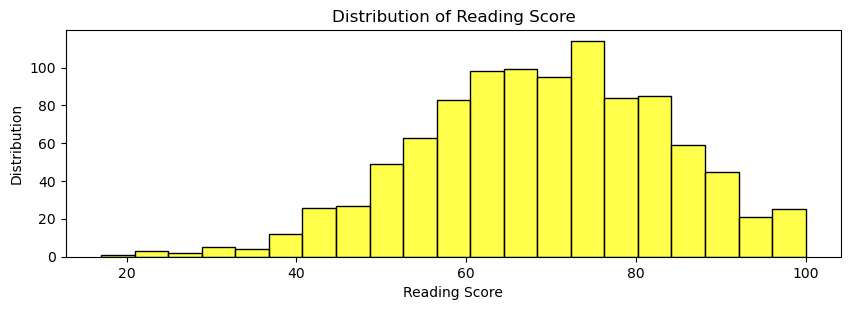

In [31]:
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 2)
sns.histplot(data=df, x=df['reading score'], alpha=0.7, color='yellow')
plt.xlabel('Reading Score')
plt.ylabel('Distribution')
plt.title('Distribution of Reading Score')


Text(0.5, 1.0, 'Distribution of Writing Score')

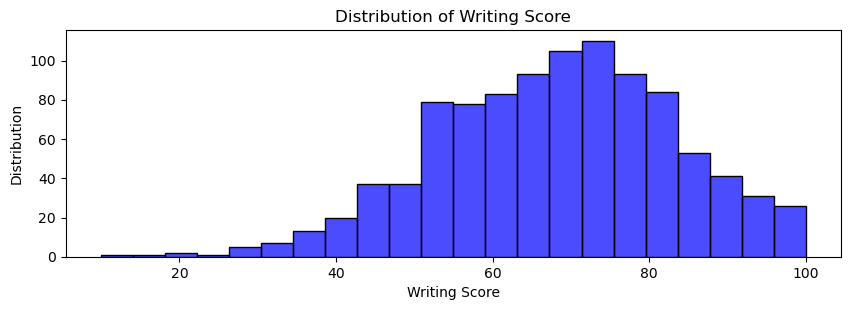

In [32]:
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 3)
sns.histplot(data=df, x=df['writing score'], alpha=0.7, color='blue')
plt.xlabel('Writing Score')
plt.ylabel('Distribution')
plt.title('Distribution of Writing Score')


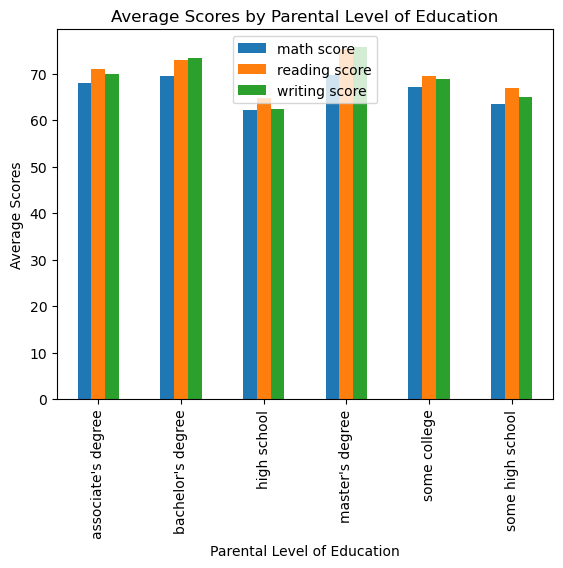

In [33]:
parent = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
parent.plot(kind='bar')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Scores')
plt.title('Average Scores by Parental Level of Education')
plt.show()


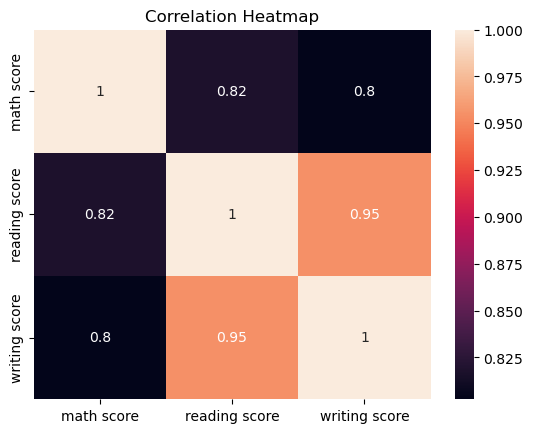

In [34]:
# Correlation Heatmap
numeric_columns = df.select_dtypes(include=['number'])
corr = numeric_columns.corr()

sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

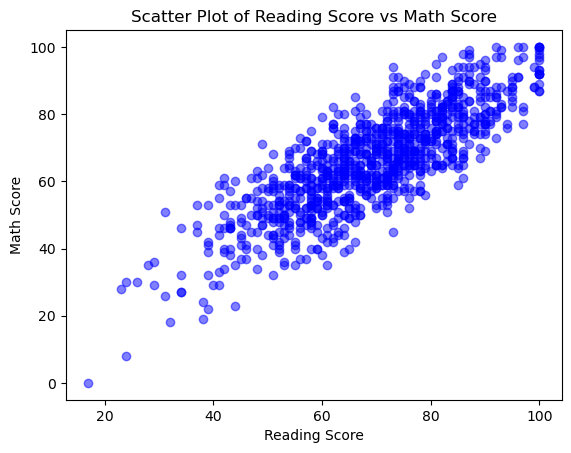

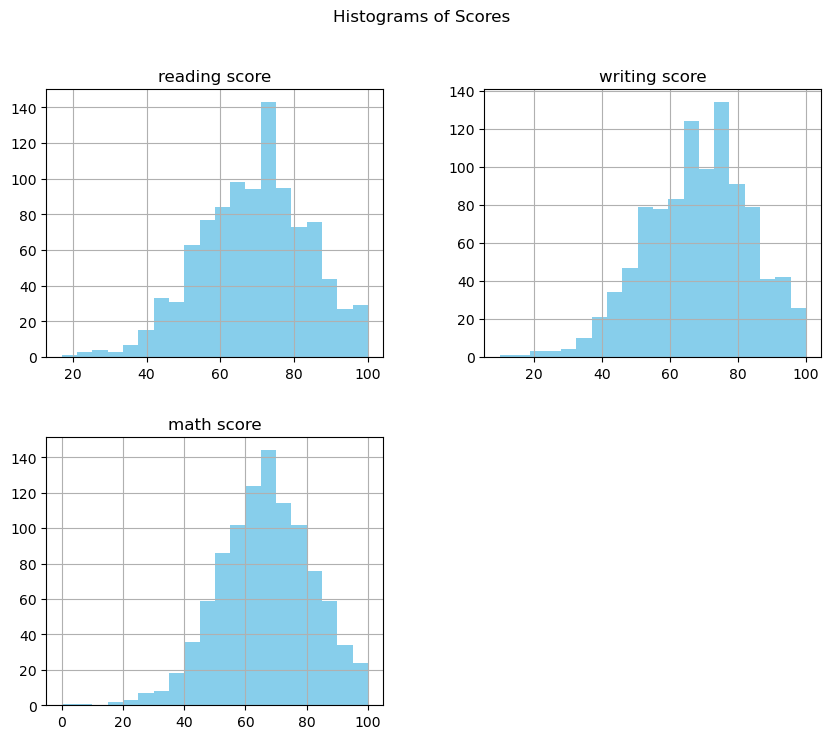

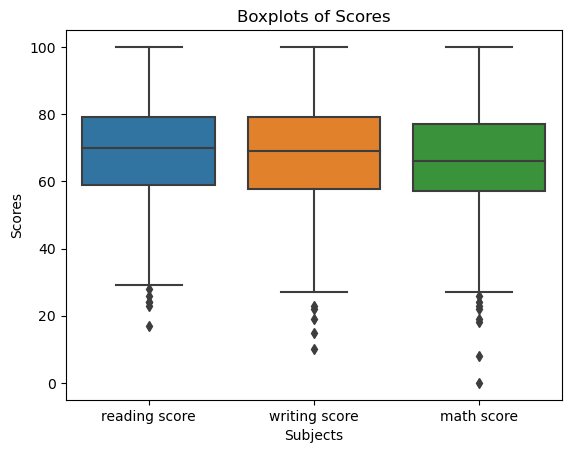

C:\Users\SK\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


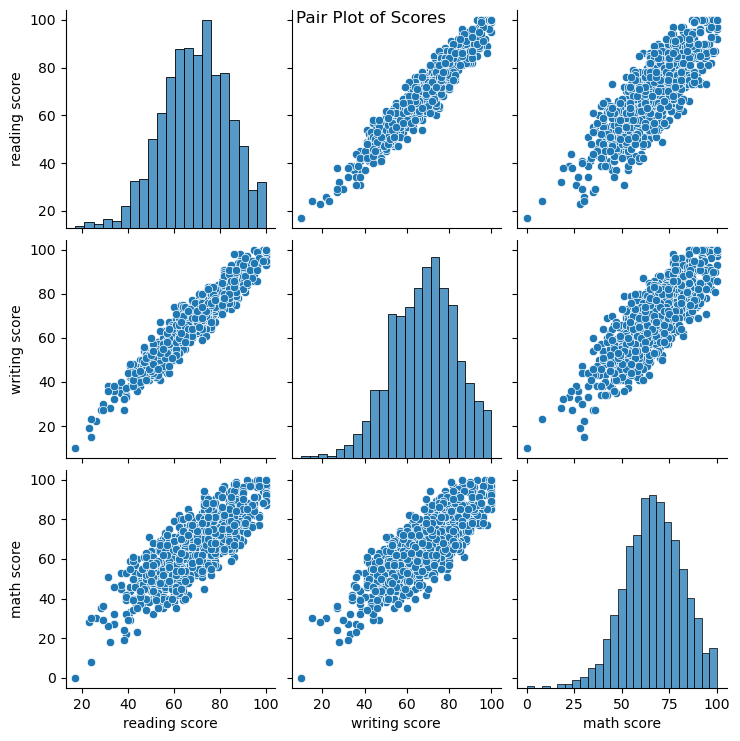

In [35]:

class MLAnalysisModel:
    def __init__(self, root):
        self.root = root
        self.root.title("Student performance analysis")
        self.root.geometry("400x400")
        self.root.configure(bg='black')

        self.load_button = Button(root, text="Load Dataset", command=self.load_dataset)
        self.load_button.pack(pady=20)

        self.train_button = Button(root, text="Train Model", command=self.train_model)
        self.train_button.pack(pady=20)

        self.visualize_button = Button(root, text="Visualize Results", command=self.visualize_results)
        self.visualize_button.pack(pady=20)

        self.info_label = Label(root, text="")
        self.info_label.pack(pady=20)

    def load_dataset(self):
        file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
        if file_path:
            self.df = pd.read_csv(file_path)
            self.info_label.config(text="Dataset Loaded Successfully")

    def train_model(self):
        try:
            features = self.df[['reading score', 'writing score']]
            target = self.df['math score']

            X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            
            self.info_label.config(text=f"Model Trained Successfully. Mean Squared Error: {mse:.2f}")
        except AttributeError:
            self.info_label.config(text="Please load the dataset first")

    def visualize_results(self):
        try:
            self.plot_scatter()
            self.plot_histograms()
            self.plot_boxplots()
            self.plot_pairplot()
        except AttributeError:
            self.info_label.config(text="Please train the model first")

    def plot_scatter(self):
        plt.scatter(self.df['reading score'], self.df['math score'], color='blue', alpha=0.5)
        plt.xlabel('Reading Score')
        plt.ylabel('Math Score')
        plt.title('Scatter Plot of Reading Score vs Math Score')
        plt.show()

    def plot_histograms(self):
        self.df[['reading score', 'writing score', 'math score']].hist(figsize=(10, 8), bins=20, color='skyblue')
        plt.suptitle('Histograms of Scores')
        plt.show()

    def plot_boxplots(self):
        sns.boxplot(data=self.df[['reading score', 'writing score', 'math score']])
        plt.xlabel('Subjects')
        plt.ylabel('Scores')
        plt.title('Boxplots of Scores')
        plt.show()

    def plot_pairplot(self):
        sns.pairplot(self.df[['reading score', 'writing score', 'math score']])
        plt.suptitle('Pair Plot of Scores')
        plt.show()


if __name__ == "__main__":
    root = Tk()
    app = MLAnalysisModel(root)
    root.mainloop()